In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import io

# Load the uploaded CSV file
df = pd.read_csv(io.BytesIO(uploaded['credit_card_fraud_dataset.csv']))

# Show the first few rows
df.head()


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
df = pd.read_csv("credit_card_fraud_dataset.csv")

# Convert TransactionDate to datetime
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

# Feature engineering: extract time-based features
df['Hour'] = df['TransactionDate'].dt.hour
df['DayOfWeek'] = df['TransactionDate'].dt.dayofweek
df['Month'] = df['TransactionDate'].dt.month

# Drop columns not needed for modeling
df_processed = df.drop(['TransactionDate', 'TransactionID'], axis=1)

# Encode categorical features
le_type = LabelEncoder()
le_loc = LabelEncoder()
df_processed['TransactionType'] = le_type.fit_transform(df_processed['TransactionType'])
df_processed['Location'] = le_loc.fit_transform(df_processed['Location'])

# Scale numerical features
scaler = StandardScaler()
df_processed[['Amount', 'MerchantID']] = scaler.fit_transform(df_processed[['Amount', 'MerchantID']])

# Separate features and target
X = df_processed.drop('IsFraud', axis=1)
y = df_processed['IsFraud']

# (Optional) Print the first few rows
print(X.head())
print(y.head())


     Amount  MerchantID  TransactionType  Location  Hour  DayOfWeek  Month
0  1.173161    0.645357                1         7    14          2      4
1  0.112740   -1.360085                1         1    13          1      3
2 -1.187661   -0.372950                0         4    10          0      1
3  0.705284    1.532047                0         5    23          5      4
4 -1.475326   -0.092396                0         6    18          4      7
0    0
1    0
2    0
3    0
4    0
Name: IsFraud, dtype: int64


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
df = pd.read_csv('credit_card_fraud_dataset.csv')

# Handle missing values
df = df.dropna()

# Remove duplicates
df = df.drop_duplicates()

# Handle outliers using IQR method for 'Amount'
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Amount'] >= lower_bound) & (df['Amount'] <= upper_bound)]

# Encode categorical features
le_transaction_type = LabelEncoder()
le_location = LabelEncoder()

df['TransactionType'] = le_transaction_type.fit_transform(df['TransactionType'])
df['Location'] = le_location.fit_transform(df['Location'])

# Convert 'TransactionDate' to datetime and extract features
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['Hour'] = df['TransactionDate'].dt.hour
df['DayOfWeek'] = df['TransactionDate'].dt.dayofweek
df.drop('TransactionDate', axis=1, inplace=True)

# Feature scaling for numeric columns
scaler = StandardScaler()
numeric_features = ['Amount', 'MerchantID', 'Hour', 'DayOfWeek']
df[numeric_features] = scaler.fit_transform(df[numeric_features])

# Final processed DataFrame
print(df.head())


   TransactionID    Amount  MerchantID  TransactionType  Location  IsFraud  \
0              1  1.173161    0.645357                1         7        0   
1              2  0.112740   -1.360085                1         1        0   
2              3 -1.187661   -0.372950                0         4        0   
3              4  0.705284    1.532047                0         5        0   
4              5 -1.475326   -0.092396                0         6        0   

       Hour  DayOfWeek  
0  0.361273  -0.508770  
1  0.216715  -1.009016  
2 -0.216958  -1.509262  
3  1.662294   0.991967  
4  0.939505   0.491722  


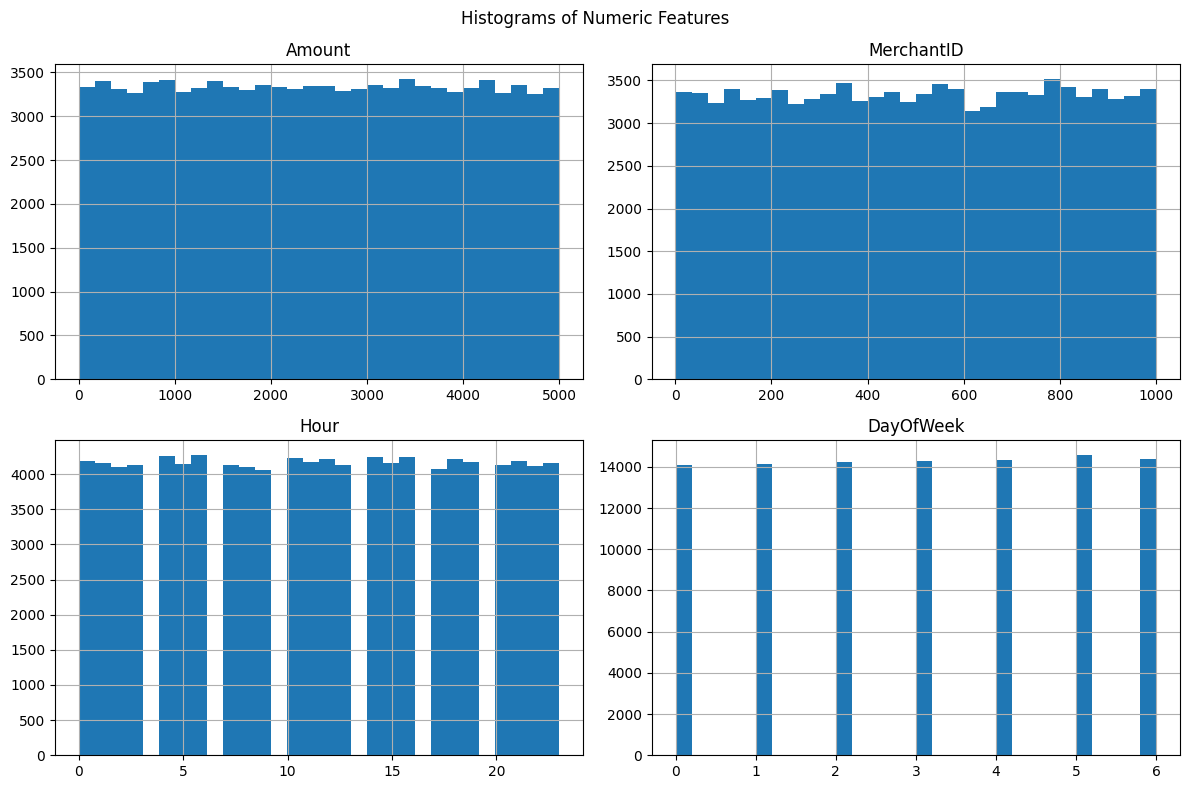

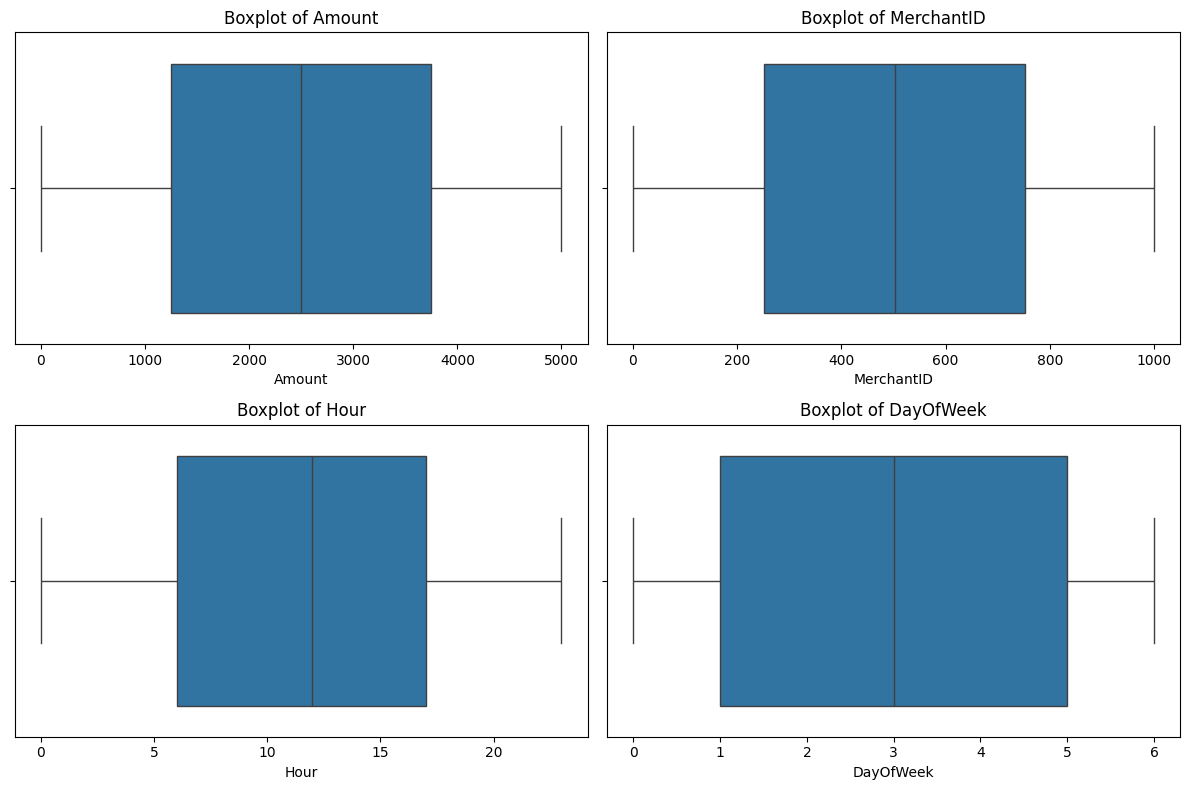

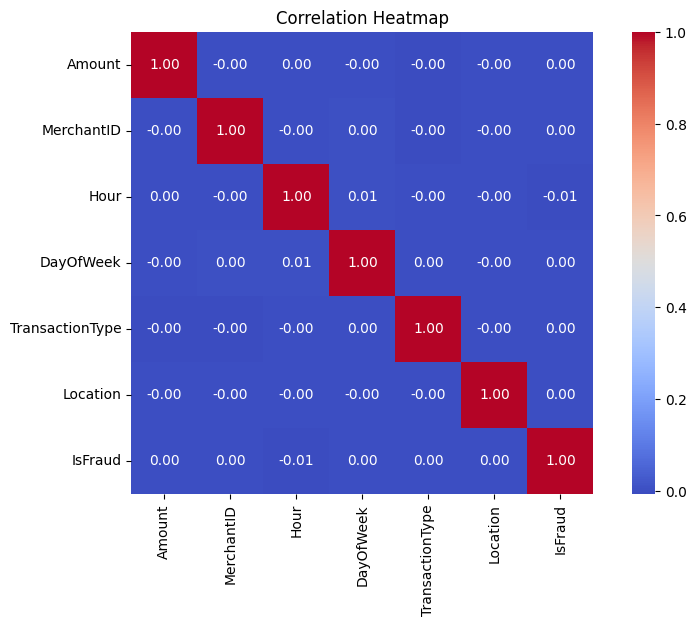

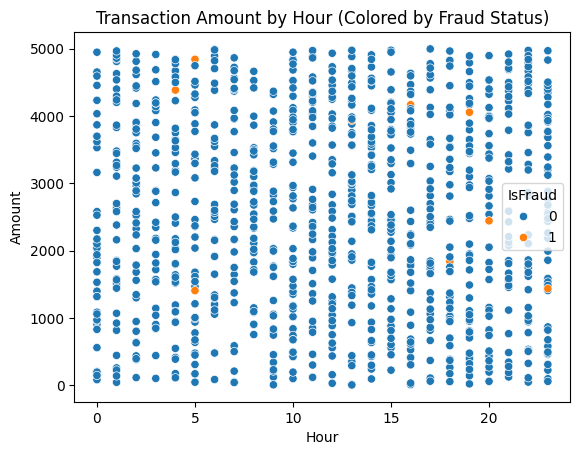

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('credit_card_fraud_dataset.csv')

# Preprocess for EDA
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['Hour'] = df['TransactionDate'].dt.hour
df['DayOfWeek'] = df['TransactionDate'].dt.dayofweek

# Encode categorical features
df['TransactionType'] = df['TransactionType'].astype('category').cat.codes
df['Location'] = df['Location'].astype('category').cat.codes

# Histograms
numeric_cols = ['Amount', 'MerchantID', 'Hour', 'DayOfWeek']
df[numeric_cols].hist(bins=30, figsize=(12, 8), layout=(2, 2))
plt.suptitle("Histograms of Numeric Features")
plt.tight_layout()
plt.show()

# Boxplots
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
corr = df[['Amount', 'MerchantID', 'Hour', 'DayOfWeek', 'TransactionType', 'Location', 'IsFraud']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Heatmap")
plt.show()

# Sample scatter plots to visualize trends
sns.scatterplot(x='Hour', y='Amount', hue='IsFraud', data=df.sample(1000))
plt.title("Transaction Amount by Hour (Colored by Fraud Status)")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures

# Load dataset
df = pd.read_csv('credit_card_fraud_dataset.csv')

# --- Feature Engineering ---
# Convert to datetime
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['Hour'] = df['TransactionDate'].dt.hour
df['DayOfWeek'] = df['TransactionDate'].dt.dayofweek

In [ ]:
df['TransactionType'] = df['TransactionType'].astype('category').cat.codes
df['Location'] = df['Location'].astype('category').cat.codes

# Drop raw datetime
df.drop('TransactionDate', axis=1, inplace=True)


In [ ]:
 # Transformation Techniques ---
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
poly_feature_names = poly.get_feature_names_out(X.columns)
print("\nSample Polynomial Features:\n", poly_feature_names[:10])


Sample Polynomial Features:
 ['Amount' 'MerchantID' 'TransactionType' 'Location' 'Hour' 'DayOfWeek'
 'Month' 'Amount^2' 'Amount MerchantID' 'Amount TransactionType']


In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv('credit_card_fraud_dataset.csv')

# Convert 'TransactionDate' to datetime
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], errors='coerce')

# Create new features only if 'TransactionDate' was parsed correctly
if df['TransactionDate'].isnull().sum() == 0:
    df['Hour'] = df['TransactionDate'].dt.hour
    df['DayOfWeek'] = df['TransactionDate'].dt.dayofweek
else:
    print("Warning: Some TransactionDate values could not be converted to datetime.")

# Encode categorical features safely
if 'TransactionType' in df.columns:
    df['TransactionType'] = df['TransactionType'].astype('category').cat.codes
if 'Location' in df.columns:
    df['Location'] = df['Location'].astype('category').cat.codes

# Create IsWeekend if 'DayOfWeek' exists
if 'DayOfWeek' in df.columns:
    df['IsWeekend'] = df['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)

# Create HighAmount using IQR
if 'Amount' in df.columns:
    high_amount_threshold = df['Amount'].quantile(0.75)
    df['HighAmount'] = df['Amount'].apply(lambda x: 1 if x > high_amount_threshold else 0)

# Create MerchantFreq only if MerchantID exists
if 'MerchantID' in df.columns:
    df['MerchantFreq'] = df.groupby('MerchantID')['TransactionID'].transform('count')

# Drop the original date column
df.drop(columns=['TransactionDate'], inplace=True, errors='ignore')

# Show sample of new data
print(df.head())


   TransactionID   Amount  MerchantID  TransactionType  Location  IsFraud  \
0              1  4189.27         688                1         7        0   
1              2  2659.71         109                1         1        0   
2              3   784.00         394                0         4        0   
3              4  3514.40         944                0         5        0   
4              5   369.07         475                0         6        0   

   Hour  DayOfWeek  IsWeekend  HighAmount  MerchantFreq  
0    14          2          0           1           110  
1    13          1          0           0           115  
2    10          0          0           0            85  
3    23          5          1           0            89  
4    18          4          0           0            94  


In [ ]:
# Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the dataset
df = pd.read_csv("credit_card_fraud_dataset.csv")

# Preprocessing
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['Hour'] = df['TransactionDate'].dt.hour
df['DayOfWeek'] = df['TransactionDate'].dt.dayofweek
df = df.drop(['TransactionID', 'TransactionDate'], axis=1)

# Encode categorical features
df = pd.get_dummies(df, columns=['TransactionType', 'Location'], drop_first=True)

# Features and target
X = df.drop('IsFraud', axis=1)
y = df['IsFraud']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# Model 1: Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)
lr_proba = lr.predict_proba(X_test)[:, 1]

# Model 2: Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
rf_proba = rf.predict_proba(X_test)[:, 1]

# Model 3: XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)
xgb_proba = xgb.predict_proba(X_test)[:, 1]

# Model 4: Neural Network
nn = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
nn.fit(X_train, y_train, epochs=10, batch_size=64, verbose=1)

nn_proba = nn.predict(X_test).ravel()
nn_preds = (nn_proba > 0.5).astype(int)

# Evaluation Function
def evaluate_model(name, y_true, y_pred, y_score):
    print(f"\n{name} Results:")
    print(classification_report(y_true, y_pred))
    print(f"ROC-AUC Score: {roc_auc_score(y_true, y_score):.4f}")

# Evaluate all models
evaluate_model("Logistic Regression", y_test, lr_preds, lr_proba)
evaluate_model("Random Forest", y_test, rf_preds, rf_proba)
evaluate_model("XGBoost", y_test, xgb_preds, xgb_proba)
evaluate_model("Neural Network", y_test, nn_preds, nn_proba)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:17:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9782 - loss: 0.0942
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9898 - loss: 0.0581
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9902 - loss: 0.0558
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9902 - loss: 0.0558
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9903 - loss: 0.0549
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9903 - loss: 0.0549
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9896 - loss: 0.0580
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9896 - loss: 0.0579
Epoch 9/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9901 - loss: 0.0555
Epoch 10/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9902 - loss: 0.0550
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

Logistic Regression Results:
              precision    recall  f1-score   support

    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Model Evaluation Summary:

Logistic Regression:
  Accuracy: 0.99
  Recall: 0.0
  F1-Score: 0.0
  ROC-AUC: 0.462
  RMSE: 0.1

Random Forest:
  Accuracy: 0.99
  Recall: 0.0
  F1-Score: 0.0
  ROC-AUC: 0.501
  RMSE: 0.1

XGBoost:
  Accuracy: 0.99
  Recall: 0.0
  F1-Score: 0.0
  ROC-AUC: 0.493
  RMSE: 0.1

Neural Network:
  Accuracy: 0.99
  Recall: 0.0
  F1-Score: 0.0
  ROC-AUC: 0.496
  RMSE: 0.1



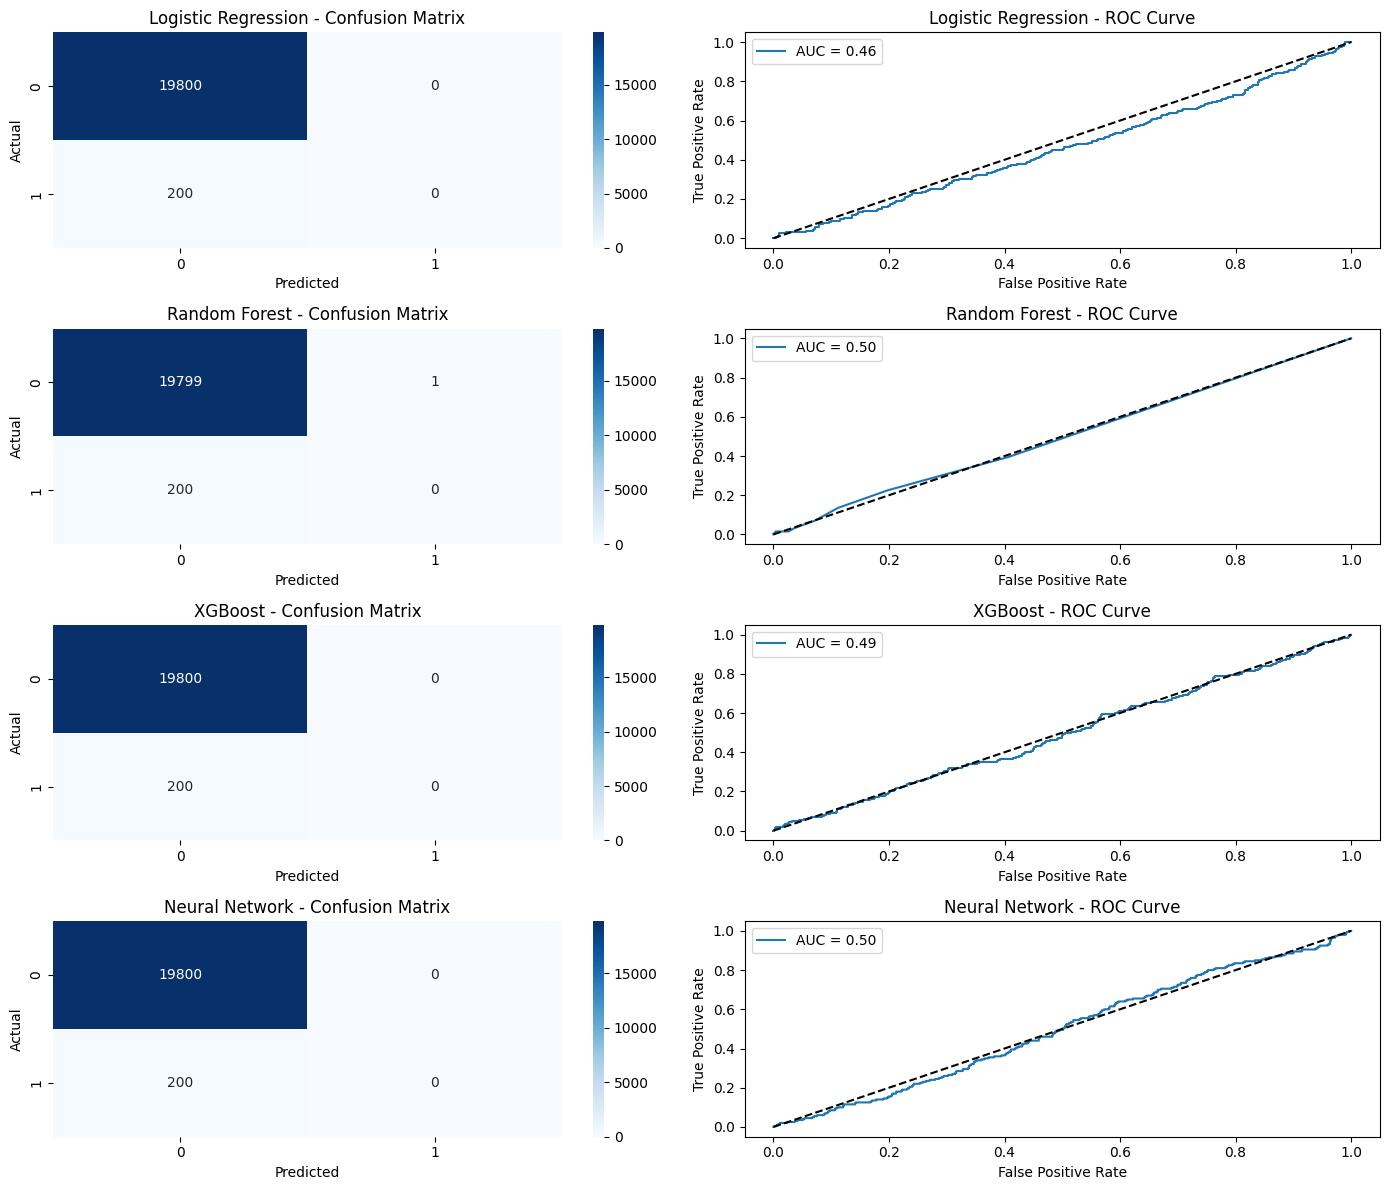

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    accuracy_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    roc_curve,
    mean_squared_error
)

# Dictionary containing model predictions: (y_true, y_pred, y_proba)
models_outputs = {
    "Logistic Regression": (y_test, lr_preds, lr_proba),
    "Random Forest": (y_test, rf_preds, rf_proba),
    "XGBoost": (y_test, xgb_preds, xgb_proba),
    "Neural Network": (y_test, nn_preds, nn_proba),
}

# Evaluation summary
evaluation_summary = {}

for name, (y_true, y_pred, y_proba) in models_outputs.items():
    evaluation_summary[name] = {
        "Accuracy": round(accuracy_score(y_true, y_pred), 3),
        "Recall": round(recall_score(y_true, y_pred), 3),
        "F1-Score": round(f1_score(y_true, y_pred), 3),
        "ROC-AUC": round(roc_auc_score(y_true, y_proba), 3),
        # Calculate RMSE by taking the square root of MSE
        "RMSE": round(np.sqrt(mean_squared_error(y_true, y_pred)), 3)
    }

# Print evaluation results
print("Model Evaluation Summary:\n")
for model, metrics in evaluation_summary.items():
    print(f"{model}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value}")
    print()

# Plot Confusion Matrices and ROC Curves
plt.figure(figsize=(14, 12))
for i, (model_name, (y_true, y_pred, y_proba)) in enumerate(models_outputs.items()):
    # Confusion Matrix
    plt.subplot(4, 2, 2 * i + 1)
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    plt.subplot(4, 2, 2 * i + 2)
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_true, y_proba):.2f}")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f"{model_name} - ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()

plt.tight_layout()
plt.show()